## COVID STATS WEB SCRAPING and ANALYSIS FOR ALL WORLD COUNTRIES
## SCRIPT is 100% in working state as of 4/30/2020

In [1]:
import pandas as pd
#import geopandas as gpd
import requests
from bs4 import BeautifulSoup
import re
from datetime import date
import pyodbc
from datetime import datetime

### Scraping new Data from www.worldometers.info

In [2]:
r = requests.get("https://www.worldometers.info/coronavirus/", headers={'User-agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:61.0) Gecko/20100101 Firefox/61.0'})
c = r.content
soup=BeautifulSoup(c,"html.parser")
#print(soup.prettify)
x1 = soup.title.string
s = ''.join(x for x in x1 if x.isdigit())
today = date.today()


### Listing all the cases reported and Deaths occured till today

In [3]:
cases = s[0:6]
print('Cases Reported: as of ',today,' is ',cases)
deaths = s[7:13]
print('Deaths Reported: as of ',today,' is ',deaths)
table = soup.find('table')
table_rows = table.find_all('tr')
List = [] 

Cases Reported: as of  2020-04-30  is  323206
Deaths Reported: as of  2020-04-30  is  228504


### Loooping to find the state Wise Division of cases & Arranging the data in the columnar format


In [4]:
for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    List.append(row)
df = pd.DataFrame(List) 
df = df[1:202]
df.columns = ['Country', 'Total_Cases', 'New_Cases', 'Total_Deaths', 'New_Deaths', 'Total_Recovered','Active_Cases','Serious_Cases', 'Total_Cases/1M_pop', 'Deaths/1M_pop', 'Total_Tests','Tests/1M_pop','Continent']


### Cleaning the data

In [5]:
def remove(string): 
    return string.replace(" ", "")

df['New_Cases'] = df['New_Cases'].str.replace('+', '')
df['New_Cases'] = df['New_Cases'].str.replace(',','')
remove(df['New_Cases'])

df['New_Deaths'] = df['New_Deaths'].str.replace('+', '')
df['New_Deaths'] = df['New_Deaths'].str.replace(',', '')
df['New_Deaths'] = df['New_Deaths'].str.strip()
remove(df['New_Deaths'])

df['Total_Cases'] = df['Total_Cases'].str.replace(',', '')
df['Total_Cases'] = df['Total_Cases'].str.replace('+', '')
remove(df['Total_Cases'])

df['Total_Deaths'] = df['Total_Deaths'].str.replace(',', '')
df['Total_Deaths'] = df['Total_Deaths'].str.replace('+', '')
df['Total_Deaths'] = df['Total_Deaths'].str.strip()
remove(df['Total_Deaths'])

df['Active_Cases'] = df['Active_Cases'].str.replace(',', '')
df['Active_Cases'] = df['Active_Cases'].str.replace('+', '')
remove(df['Active_Cases'] )

df['Total_Recovered'] = df['Total_Recovered'].str.replace(',', '')
df['Total_Recovered'] = df['Total_Recovered'].str.replace('+', '')
df['Total_Recovered'] = df['Total_Recovered'].str.replace('N/A', '')
remove(df['Total_Recovered'] )

df['Serious_Cases'] = df['Serious_Cases'].str.replace(',', '')
df['Serious_Cases'] = df['Serious_Cases'].str.replace('+', '')
remove(df['Serious_Cases'] )

df['Total_Cases/1M_pop'] = df['Total_Cases/1M_pop'].str.replace(',', '')
df['Total_Cases/1M_pop'] = df['Total_Cases/1M_pop'].str.replace('+', '')
remove(df['Serious_Cases'] )

df['Total_Tests'] = df['Total_Tests'].str.replace(',', '')
df['Total_Tests'] = df['Total_Tests'].str.replace('+', '')
remove(df['Serious_Cases'] )

df['Tests/1M_pop'] = df['Tests/1M_pop'].str.replace(',', '')
df['Tests/1M_pop'] = df['Tests/1M_pop'].str.replace('+', '')
remove(df['Tests/1M_pop'] )

df.fillna(0)
#df.replace('',0)

df


,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Cases,Total_Cases/1M_pop,Deaths/1M_pop,Total_Tests,Tests/1M_pop,Continent
1,\nNorth America\n,1152608,1682,67130,183,182769,902709,19940,,,,,North America
2,\nEurope\n,1356135,8755,133176,229,490098,732861,24139,,,,,Europe
3,\nAsia\n,510086,2758,18330,53,257384,234372,5778,,,,,Asia
4,\nSouth America\n,166468,654,8150,6,57298,101020,9748,,,,,South America
5,\nOceania\n,8330,8,110,2,7035,1185,41,,,,,Australia/Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Saint Kitts and Nevis,15,,,,6,9,,282,,293,5508,North America
198,Nicaragua,13,,3,,7,3,,2,0.5,,,North America
199,Falkland Islands,13,,,,11,2,,3736,,372,106897,South America
200,Turks and Caicos,12,,1,,5,6,,310,26,83,2144,North America


### Converting to Integer Format Replacing Blanks with 0's

In [6]:
def convert_fill(df):
    return df.stack().apply(pd.to_numeric, errors='ignore').fillna(0).unstack()

df  = convert_fill(df)

df['Total_Cases'] = df['Total_Cases'].astype(int)

df['Total_Deaths'] = df['Total_Deaths'].astype(int)

df['New_Cases'] = df['New_Cases'].astype(int)

df['Active_Cases'] = df['Active_Cases'].astype(int)

df['Total_Recovered'] = df['Total_Recovered'].astype(int)

df['New_Deaths'] = df['New_Deaths'].astype(int)

df['Serious_Cases'] = df['Serious_Cases'].astype(int)

#df['Total_Cases/1M_pop'] = df['Total_Cases/1M_pop'].astype(int)

#df['Deaths/1M_pop'] = df['Deaths/1M_pop'].astype(int)

df['Total_Tests'] = df['Total_Tests'].astype(int)


df

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Cases,Total_Cases/1M_pop,Deaths/1M_pop,Total_Tests,Tests/1M_pop,Continent
1,\nNorth America\n,1152608,1682,67130,183,182769,902709,19940,0,0,0,0,North America
2,\nEurope\n,1356135,8755,133176,229,490098,732861,24139,0,0,0,0,Europe
3,\nAsia\n,510086,2758,18330,53,257384,234372,5778,0,0,0,0,Asia
4,\nSouth America\n,166468,654,8150,6,57298,101020,9748,0,0,0,0,South America
5,\nOceania\n,8330,8,110,2,7035,1185,41,0,0,0,0,Australia/Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Saint Kitts and Nevis,15,0,0,0,6,9,0,282,0,293,5508,North America
198,Nicaragua,13,0,3,0,7,3,0,2,0.5,0,0,North America
199,Falkland Islands,13,0,0,0,11,2,0,3736,0,372,106897,South America
200,Turks and Caicos,12,0,1,0,5,6,0,310,26,83,2144,North America


### Seperating Countries and Continent Data

In [7]:
df_country = df[7:]

df_continent = df[0:7]
df_continent['Country'] = df_continent['Country'].str.strip()

C:\Users\jaysh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Plotting Bar Graphs and TreeMap

In [8]:
dfplot = df_country.head(10)

In [9]:
dfplot = dfplot[1:7]

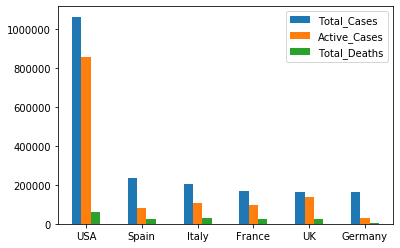

In [75]:
Total_Cases = dfplot['Total_Cases'].values.tolist()
Total_Deaths = dfplot['Total_Deaths'].values.tolist()
Active_Cases = dfplot['Active_Cases'].values.tolist()
Total_Tests = dfplot['Total_Tests'].values.tolist()

State = dfplot['Country'].values.tolist()
index = State
dfplot1 = pd.DataFrame({'Total_Cases': Total_Cases,
                      'Active_Cases': Active_Cases,
                      'Total_Deaths': Total_Deaths}, 
                       index = index)

ax = dfplot1.plot.bar(rot=0)

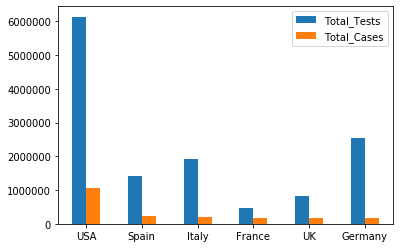

In [11]:
Total_Cases = dfplot['Total_Cases'].values.tolist()
Total_Deaths = dfplot['Total_Deaths'].values.tolist()
Active_Cases = dfplot['Active_Cases'].values.tolist()
Total_Tests = dfplot['Total_Tests'].values.tolist()

State = dfplot['Country'].values.tolist()
index = State
dfplot1 = pd.DataFrame({'Total_Tests': Total_Tests,
                      'Total_Cases': Total_Cases}, 
                       index = index)

ax = dfplot1.plot.bar(rot=0)

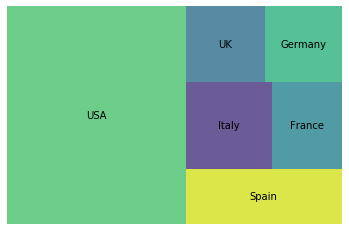

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 
my_values=[i**3 for i in range(1,1000)]
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

# If you have 2 lists
# squarify.plot(sizes=Total_Cases, label=State, alpha=.7, color = colors)
# plt.axis('off')
# plt.show()

squarify.plot(sizes=Total_Cases, label=State, alpha=.8 )
plt.axis('off')
plt.show()

### Connecting to SQL SERVER to store data in relational format

In [13]:
#Define the server name and the database name
server = 'Jayshil'
database = 'usacovid19'

#define our connection string

cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};\
                        SERVER='+server+';\
                        DATABASE='+ database+';\
                        Trusted_Connection=yes;')


cursor = cnxn.cursor()

### Inserting Country DATA to the SQL SERVER


In [14]:
for index,row in df_country.iterrows():
    cursor.execute("""INSERT INTO Country_Records ([Country],
                   [Total_Cases],[New_Cases],[Total_Deaths],[New_Deaths],[Active_Cases],
                   [Total_Tests],[Serious_Cases],[Total_Recovered],[Continent], [Date])
     VALUES (?,?,?,?,?,?,?,?,?,?,?)""", 
                            row['Country'], 
                            row['Total_Cases'], 
                            row['New_Cases'],
                            row['Total_Deaths'],
                            row['New_Deaths'],
                            row['Active_Cases'],
                            row['Total_Tests'],
                            row['Serious_Cases'],
                            row['Total_Recovered'],
                            row['Continent'],
                            datetime.now()) 
cnxn.commit()
cursor.close()
cnxn.close()

In [15]:
server = 'Jayshil'
database = 'usacovid19'

#define our connection string

cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};\
                        SERVER='+server+';\
                        DATABASE='+ database+';\
                        Trusted_Connection=yes;')
cursor = cnxn.cursor()

SQL_Query = pd.read_sql_query('''SELECT * FROM [Country_Records]''', cnxn)

cursor.close()

In [16]:
SQL_Query

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Active_Cases,Total_Tests,Serious_Cases,Total_Recovered,Continent,Date
0,World,3232061,13877,228504,474,1995692,0,59772,1007865,All,2020-04-30 05:18:31.813
1,USA,1064572,378,61669,13,855492,6139911,18671,147411,North America,2020-04-30 05:18:31.817
2,Spain,236899,0,24275,0,79695,1414477,7764,132929,Europe,2020-04-30 05:18:31.820
3,Italy,203591,0,27682,0,104657,1910761,1795,71252,Europe,2020-04-30 05:18:31.820
4,France,166420,0,24087,0,94105,463662,4207,48228,Europe,2020-04-30 05:18:31.823
...,...,...,...,...,...,...,...,...,...,...,...
189,Saint Kitts and Nevis,15,0,0,0,9,293,0,6,North America,2020-04-30 05:18:31.910
190,Nicaragua,13,0,3,0,3,0,0,7,North America,2020-04-30 05:18:31.913
191,Falkland Islands,13,0,0,0,2,372,0,11,South America,2020-04-30 05:18:31.913
192,Turks and Caicos,12,0,1,0,6,83,0,5,North America,2020-04-30 05:18:31.913


In [17]:
#Define the server name and the database name
server = 'Jayshil'
database = 'usacovid19'

#define our connection string

cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};\
                        SERVER='+server+';\
                        DATABASE='+ database+';\
                        Trusted_Connection=yes;')


cursor = cnxn.cursor()

### Inserting Continent DATA to the SQL SERVER

In [18]:
for index,row in df_continent.iterrows():
    cursor.execute("""INSERT INTO Continent_Records ([Country],
                   [Total_Cases],[New_Cases],[Total_Deaths],[New_Deaths],[Active_Cases],
                   [Total_Tests],[Serious_Cases],[Total_Recovered],[Continent], [Date])
     VALUES (?,?,?,?,?,?,?,?,?,?,?)""", 
                            row['Country'], 
                            row['Total_Cases'], 
                            row['New_Cases'],
                            row['Total_Deaths'],
                            row['New_Deaths'],
                            row['Active_Cases'],
                            row['Total_Tests'],
                            row['Serious_Cases'],
                            row['Total_Recovered'],
                            row['Continent'],
                            datetime.now()) 
cnxn.commit()
cursor.close()
cnxn.close()

In [19]:
server = 'Jayshil'
database = 'usacovid19'

#define our connection string

cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};\
                        SERVER='+server+';\
                        DATABASE='+ database+';\
                        Trusted_Connection=yes;')
cursor = cnxn.cursor()

SQL_Query2 = pd.read_sql_query('''SELECT * FROM [Continent_Records]''', cnxn)

cursor.close()

In [20]:
SQL_Query2

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Active_Cases,Total_Tests,Serious_Cases,Total_Recovered,Continent,Date
0,North America,1152608,1682,67130,183,902709,0,19940,182769,North America,2020-04-30 05:18:32.037
1,Europe,1356135,8755,133176,229,732861,0,24139,490098,Europe,2020-04-30 05:18:32.037
2,Asia,510086,2758,18330,53,234372,0,5778,257384,Asia,2020-04-30 05:18:32.040
3,South America,166468,654,8150,6,101020,0,9748,57298,South America,2020-04-30 05:18:32.040
4,Oceania,8330,8,110,2,1185,0,41,7035,Australia/Oceania,2020-04-30 05:18:32.040
5,Africa,37713,20,1593,1,23484,0,122,12636,Africa,2020-04-30 05:18:32.040
6,,721,0,15,0,61,0,4,645,0,2020-04-30 05:18:32.043


### Continent based Graphs

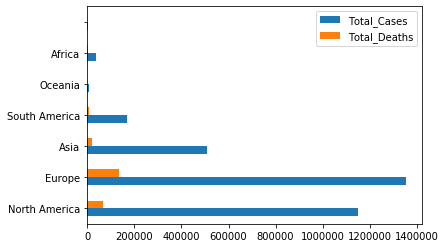

In [71]:
Total_Cases = df_continent['Total_Cases'].values.tolist()
Total_Deaths = df_continent['Total_Deaths'].values.tolist()
Active_Cases = df_continent['Active_Cases'].values.tolist()
Total_Tests = df_continent['Total_Tests'].values.tolist()

State = df_continent['Country'].values.tolist()
index = State
dfplot1 = pd.DataFrame({'Total_Cases': Total_Cases,
                      'Total_Deaths': Total_Deaths}, 
                       index = index,
                      )

ax = dfplot1.plot.barh(rot=0)

In [43]:
df_country.head()

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Cases,Total_Cases/1M_pop,Deaths/1M_pop,Total_Tests,Tests/1M_pop,Continent
8,World,3232061,13877,228504,474,1007865,1995692,59772,415,29.3,0,0,All
9,USA,1064572,378,61669,13,147411,855492,18671,3216,186,6139911,18549,North America
10,Spain,236899,0,24275,0,132929,79695,7764,5067,519,1414477,30253,Europe
11,Italy,203591,0,27682,0,71252,104657,1795,3367,458,1910761,31603,Europe
12,France,166420,0,24087,0,48228,94105,4207,2550,369,463662,7103,Europe


In [42]:
import plotly.express as px
fig = px.scatter_geo(df_country, lat="lat", lon="long", color="country",
 hover_name="Country", size="Total_Recovered",
 projection="orthographic",width=700)
fig.show()

In [58]:
Total_Cases = int(df_country['Total_Cases'][:1])
Total_Deaths = int(df_country['Total_Deaths'][:1])
Total_Recovered = int(df_country['Total_Recovered'][:1])

In [65]:
# importing libraries
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [59]:
from IPython.core.display import display, HTML

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(Total_Cases) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(Total_Deaths) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(Total_Recovered) + "</span>"+
             "</div>")
       )

In [63]:
fig = px.scatter(df_country.head(10),x='Country',y='Total_Cases',size='Total_Cases',color='Country',hover_name='Country',size_max=60)
fig.update_layout(
    title=" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
fig.show()

NameError: name 'bubble_chart' is not defined

In [67]:
def bubble_chart(n):
    fig = px.scatter(df_country.head(n), x="Country", y="Total_Cases", size="Total_Cases", color="Country",
               hover_name="Country", size_max=60)
    fig.update_layout(
    title=str(n) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

TraitError: Element of the 'children' trait of a VBox instance must be a Widget, but a value of Figure({
    'data': [{'hovertemplate': ('<b>%{hovertext}</b><br><br>Cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['World'], dtype=object),
              'legendgroup': 'World',
              'marker': {'color': '#636efa',
                         'size': array([3232061]),
                         'sizemode': 'area',
                         'sizeref': 897.7947222222223,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'World',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['World'], dtype=object),
              'xaxis': 'x',
              'y': array([3232061]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>Cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['USA'], dtype=object),
              'legendgroup': 'USA',
              'marker': {'color': '#EF553B',
                         'size': array([1064572]),
                         'sizemode': 'area',
                         'sizeref': 897.7947222222223,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'USA',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['USA'], dtype=object),
              'xaxis': 'x',
              'y': array([1064572]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>Cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Spain'], dtype=object),
              'legendgroup': 'Spain',
              'marker': {'color': '#00cc96',
                         'size': array([236899]),
                         'sizemode': 'area',
                         'sizeref': 897.7947222222223,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Spain',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Spain'], dtype=object),
              'xaxis': 'x',
              'y': array([236899]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>Cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Italy'], dtype=object),
              'legendgroup': 'Italy',
              'marker': {'color': '#ab63fa',
                         'size': array([203591]),
                         'sizemode': 'area',
                         'sizeref': 897.7947222222223,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Italy',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Italy'], dtype=object),
              'xaxis': 'x',
              'y': array([203591]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>Cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['France'], dtype=object),
              'legendgroup': 'France',
              'marker': {'color': '#FFA15A',
                         'size': array([166420]),
                         'sizemode': 'area',
                         'sizeref': 897.7947222222223,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'France',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['France'], dtype=object),
              'xaxis': 'x',
              'y': array([166420]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>Cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['UK'], dtype=object),
              'legendgroup': 'UK',
              'marker': {'color': '#19d3f3',
                         'size': array([165221]),
                         'sizemode': 'area',
                         'sizeref': 897.7947222222223,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'UK',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['UK'], dtype=object),
              'xaxis': 'x',
              'y': array([165221]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>Cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Germany'], dtype=object),
              'legendgroup': 'Germany',
              'marker': {'color': '#FF6692',
                         'size': array([161539]),
                         'sizemode': 'area',
                         'sizeref': 897.7947222222223,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Germany',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Germany'], dtype=object),
              'xaxis': 'x',
              'y': array([161539]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>Cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Turkey'], dtype=object),
              'legendgroup': 'Turkey',
              'marker': {'color': '#B6E880',
                         'size': array([117589]),
                         'sizemode': 'area',
                         'sizeref': 897.7947222222223,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Turkey',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Turkey'], dtype=object),
              'xaxis': 'x',
              'y': array([117589]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>Cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Russia'], dtype=object),
              'legendgroup': 'Russia',
              'marker': {'color': '#FF97FF',
                         'size': array([106498]),
                         'sizemode': 'area',
                         'sizeref': 897.7947222222223,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Russia',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Russia'], dtype=object),
              'xaxis': 'x',
              'y': array([106498]),
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>Cou' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Iran'], dtype=object),
              'legendgroup': 'Iran',
              'marker': {'color': '#FECB52',
                         'size': array([93657]),
                         'sizemode': 'area',
                         'sizeref': 897.7947222222223,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Iran',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Iran'], dtype=object),
              'xaxis': 'x',
              'y': array([93657]),
              'yaxis': 'y'}],
    'layout': {'legend': {'itemsizing': 'constant', 'title': {'text': 'Country'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': ' Worst hit countries'},
               'width': 700,
               'xaxis': {'anchor': 'y',
                         'categoryarray': [World, USA, Spain, Italy, France, UK,
                                           Germany, Turkey, Russia, Iran],
                         'categoryorder': 'array',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'Countries'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Confirmed Cases'}}}
}) <class 'plotly.graph_objs._figure.Figure'> was specified.